In [1]:
import pandas as pd
import numpy as np

# Bank client data:
-------------------

**Source:**

\[Moro et al., 2014\] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes','no')

Data taken from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#).

### Understanding the dataset

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
bank = pd.read_csv('../data/bank-additional/bank-additional-full.csv', sep=';')
display(bank.info(), bank.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.y.value_counts()['no'] / bank.y.value_counts()['yes']

7.876724137931035

**Business understanding**

Data bank almost always needs to find insights in imbalanced data. It is because the probability of a negative event is very low compared with positive events. Even so the banks try to identify patterns in those negative events and try several possible solutions.

In this project we are going to deal with imbalanced data. There are distinct approaches about dealing with imbalanced data and we are going to see two of them and analyze which one is better and why. Also, we have a big proportion of categorical varibles compared with the numerical variables and we will need to make some transformations after the analysis (EDA) to perform the best model.

## Data Ingestion and Schema Validation

In [5]:
import pandas as pd
import numpy as np
import yaml

import testutility as util

In [6]:
%%writefile file.yaml
file_type: csv
dataset_name: bank
file_name: bank-additional-full
table_name: bank_clients_info
inbound_delimiter: ";"
outbound_delimiter: "\n"
skip_leading_rows: 0
columns: 
    - age
    - job
    - marital
    - education
    - default
    - housing
    - loan
    - contact
    - month
    - day_of_week
    - duration
    - campaign
    - pdays
    - previous
    - poutcome
    - emp.var.rate
    - cons.price.idx
    - cons.conf.idx
    - euribor3m
    - nr.employed
    - y

Overwriting file.yaml


In [7]:
config_data = util.read_config_file("file.yaml")
config_data

{'file_type': 'csv',
 'dataset_name': 'bank',
 'file_name': 'bank-additional-full',
 'table_name': 'bank_clients_info',
 'inbound_delimiter': ';',
 'outbound_delimiter': '\n',
 'skip_leading_rows': 0,
 'columns': ['age',
  'job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'poutcome',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'y']}

In [8]:
file_type = config_data['file_type']
source_file = "../data/bank-additional/" + config_data['file_name'] + f'.{file_type}'
#print("",source_file)
df = pd.read_csv(source_file, dtype={'totalTravelDistance': 'float64'}, delimiter=config_data['inbound_delimiter'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
util.col_header_val(bank, config_data)

column name and column length validation passed


1

## EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
bank['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [30]:
bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [26]:
sns.set(color_codes=True)
sns.set_style('whitegrid')
sns.set_palette("colorblind")

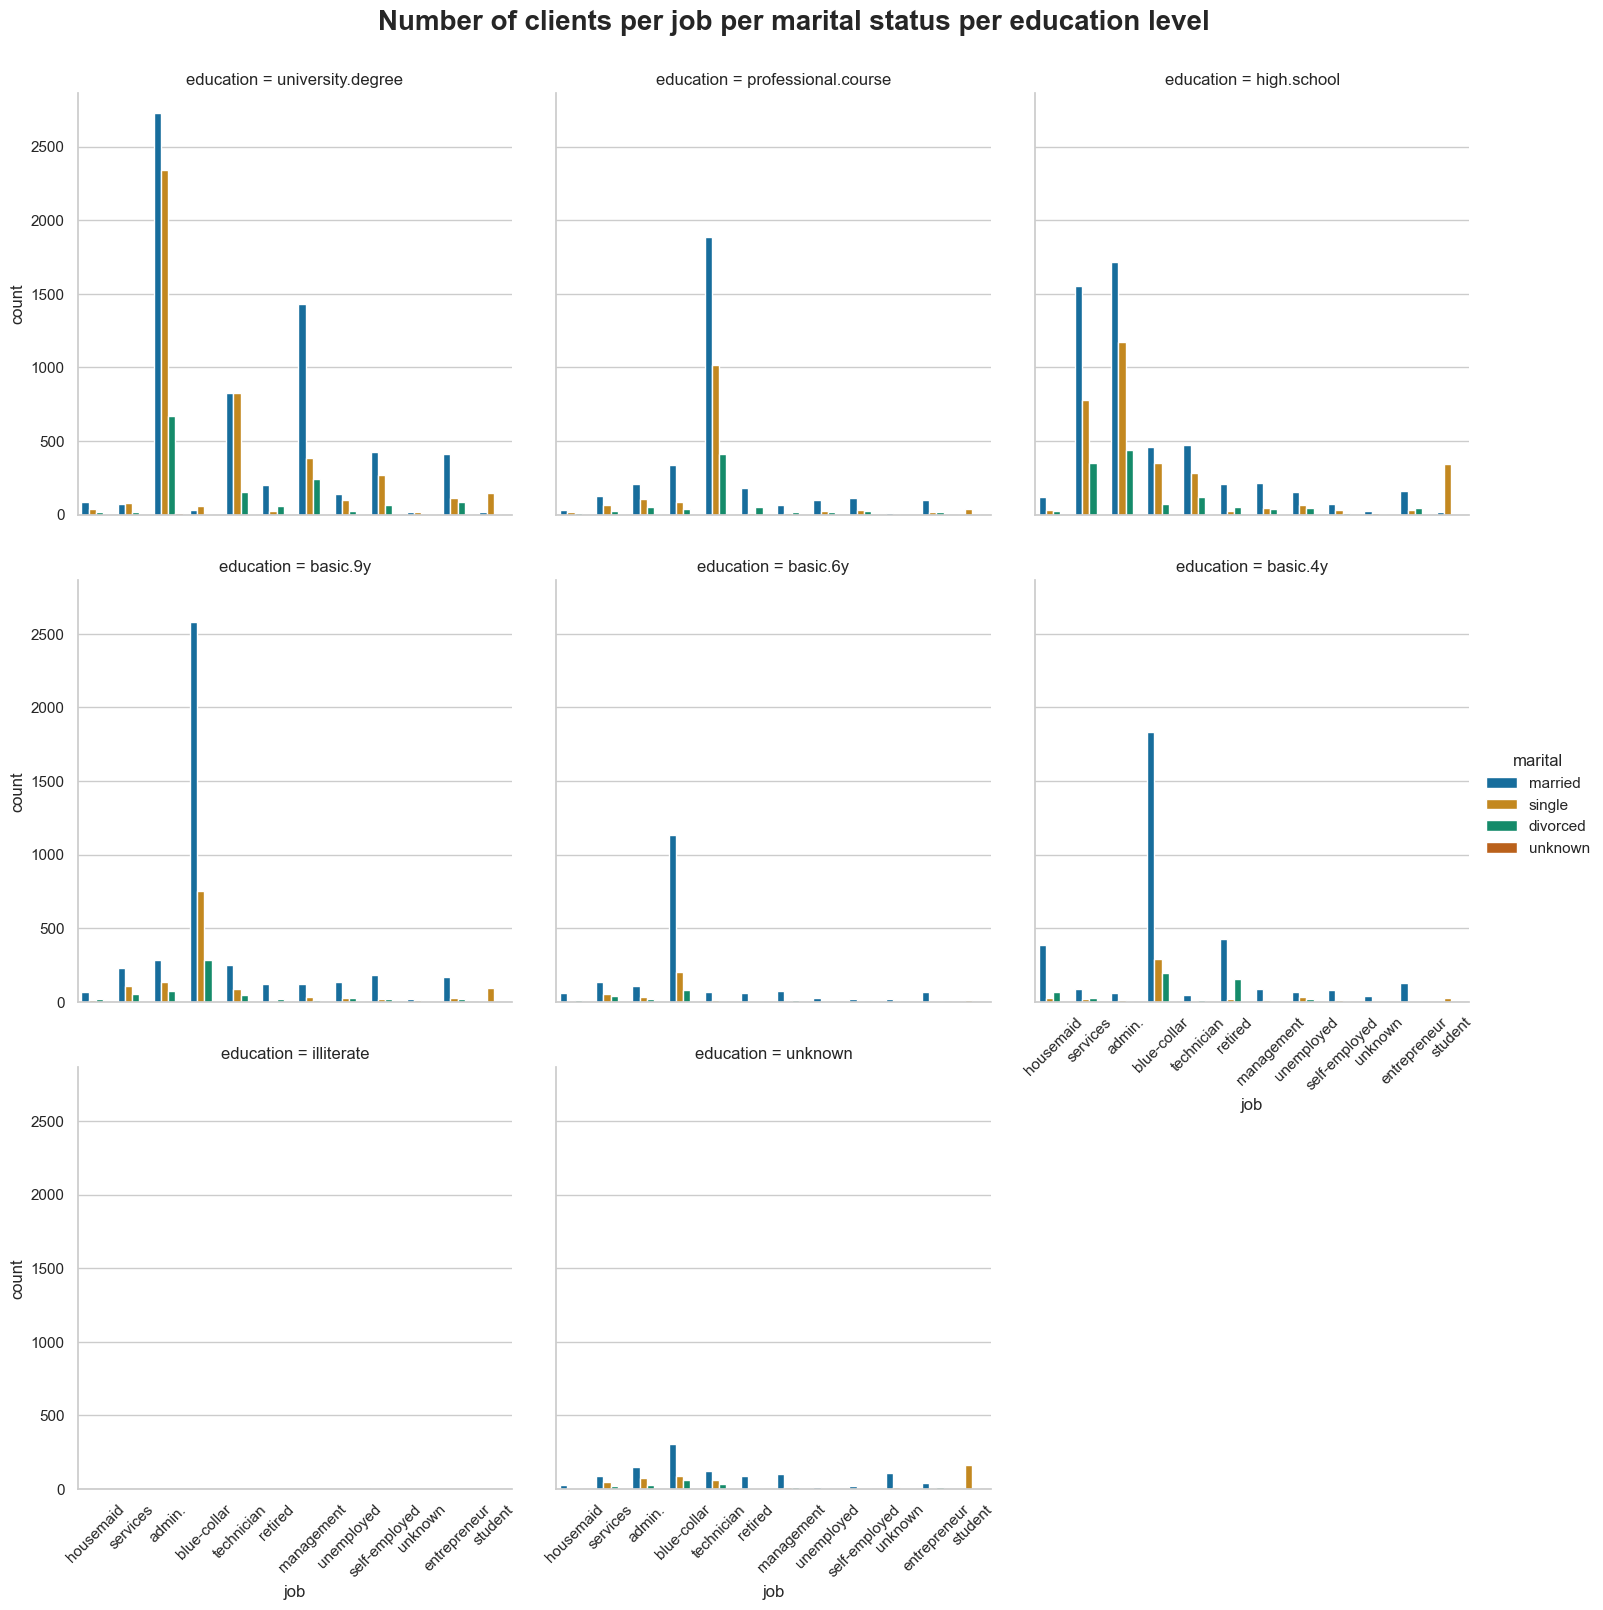

In [31]:
g = sns.catplot(kind='count', data=bank, x='job', 
                hue='marital', col='education', col_wrap=3,
                col_order=['university.degree', 'professional.course', 'high.school', 'basic.9y', 'basic.6y', 'basic.4y', 'illiterate', 'unknown'])
g.fig.suptitle("Number of clients per job per marital status per education level", y=1.03, fontsize=20, fontweight='bold')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.show()